In [1]:
import pandas as pd
import csv
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from techniques1 import *
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
def readfile(filename):
    
    arr=[]
    with open(filename,'rt',encoding='latin-1') as file:     
                samples=csv.reader(file)
                x=0
                for i in samples:
                    if x==0:
                        x=1
                        continue
                    arr.append(i)
    df=pd.DataFrame(data=arr,columns=["types","posts"])
    return df

In [3]:
def labelencode(df):
    data=df['types']
    values=array(data)
    label=LabelEncoder()
    intencode=label.fit_transform(values)
    df['typeint']=intencode
    #df['typeint'].plot(kind='hist')
    #k=np.arange(0,16)
    #x=label.inverse_transform(k)   #can access encoded actual value using x
    #print(values)
    return df

In [4]:
def call_clean():
    filename="mbti_1.csv"
    df=readfile(filename)
    df=labelencode(df)
    #slangframe=createSlangframe()
    #clean_data=preprocess(df,slangframe)
    #print(clean_data.head())
    #return clean_data
    return df
data=call_clean()

In [5]:
proc_data=np.array(data['posts'])[:1000]
label=np.array(data['typeint'])[:1000]

In [6]:
#print(label)
from matplotlib import pyplot
#plt.plot(x)
pyplot.hist(label,np.arange(0,16))

(array([ 24.,  71.,  29.,  72.,   4.,   7.,   3.,  11., 161., 237., 130.,
        153.,  15.,  27.,  56.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Patch objects>)

(array([ 19.,  57.,  23.,  58.,   3.,   6.,   2.,   9., 129., 189., 104.,
        122.,  12.,  22.,  45.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Patch objects>)

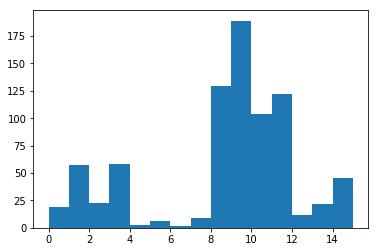

In [7]:
from sklearn.model_selection import train_test_split
trainset, testset, trainlabel, testlabel = train_test_split(proc_data, label,stratify=label, test_size=0.2)
import matplotlib as plt
from matplotlib import pyplot
#plt.plot(x)
pyplot.hist(trainlabel,np.arange(0,16))

In [8]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [9]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(trainset)]

In [10]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size,alpha=alpha, min_alpha=0.00025,min_count=1,dm =1)
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    #print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")
print(model)
print(model.docvecs['1'])

/home/nikitha/.local/lib/python3.6/site-packages/gensim/models/doc2vec.py:580: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/home/nikitha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  if sys.path[0] == '':


Model Saved
Doc2Vec(dm/m,d20,n5,w5,s0.001,t3)
[-1.3359365   2.5022824   1.6117198   0.5092325  -2.2144501   1.4386096
 -0.23627958  2.9298174  -0.06458295 -2.02648    -1.6413835   1.8519597
 -1.6314073   0.90708995  1.5952001   1.4471358  -1.3888432  -0.8381553
 -1.9434936   0.7288135 ]


In [11]:
train=[]
for i in range(len(trainset)):
    train.append(model.docvecs[i])


In [12]:
trainset=np.array(train)

In [13]:
from gensim.models.doc2vec import Doc2Vec
test=[]
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
for i in testset:
    test_data = word_tokenize(i.lower())
    test.append(model.infer_vector(test_data))
#print("V1_infer", v1)

# to find most similar doc using tags
#similar_doc = model.docvecs.most_similar('0')
#print(similar_doc)


# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
testset=np.array(test)

In [14]:
testset=np.array(test)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=6)
model.fit(trainset,trainlabel)
print(model.score(train,trainlabel))

predictionsknn = model.predict(testset)
count=0
for i in range(len(predictionsknn)):
    if predictionsknn[i]==testlabel[i]:
        count=count+1
print("accuracy=",(count*100)/len(testlabel))

0.42625
accuracy= 14.5


In [19]:
print(trainset[0])

it could be pyroluria.. you know.. it is an ongoing tension inside of you.|||Love is when other people think that your man is a garbage, idiot, and dumb, ugly, bad, mean in your eyes he is still your trophy|||well then, how we will show others our existence?|||Hi I just want to ask if other INFJs have the guts to dominate or if no chance be submissive to others. In my case Im always on the submissive side as if I have no chance to control myself or others|||Darnit baby! I want to show myself to others but cant. I want to show my talents. hahahaha. but too shy to do so. And Im so afraid of getting rejected..|||I dont know what to do. I feel incomplete, I dont feel emotionally connected and I always change every time and then. Im tired being surrounded by these people who dominates me and handling my life....|||Why are we so kind individual? I mean why do we always want to help? I think its because we want to be notice. I want to feel that I belong in this world too. Is that so wrong? Gr

In [10]:
sentences=[]
for line in trainset:
    sentences.append(line.split())
from gensim.models import Word2Vec
modelw2v=Word2Vec(sentences, size=100, window=5, min_count=1, workers=4)
print(modelw2v)
words=list(modelw2v.wv.vocab)

Word2Vec(vocab=99243, size=100, alpha=0.025)


In [20]:
a=list(modelw2v.wv.vocab.keys())
a

["'Pretty",
 'much',
 'the',
 'same:',
 '-',
 'Stuff',
 "I've",
 'forgot',
 'to',
 'do',
 'or',
 'have',
 'been',
 'procrastinating',
 'too',
 'long',
 'A',
 'song',
 "that's",
 'playing',
 'in',
 'my',
 'head',
 'on',
 'repeat',
 'very',
 'loudly,',
 'especially',
 'if',
 'I',
 "don't",
 'remember',
 'all',
 'lyrics',
 'and...|||For',
 'me',
 'is',
 'black',
 'and',
 'white.',
 'If',
 'can',
 'it',
 'right',
 'away,',
 'must',
 'away.',
 'Otherwise,',
 'end',
 'up',
 'until',
 'last',
 'minute',
 'then',
 'a',
 'hurry',
 '(which',
 'hate)',
 'plus',
 'get',
 'a...|||It',
 'depends',
 'energy',
 'of',
 'situation.',
 'feeling',
 'that',
 'person',
 'being',
 'talkative',
 'but',
 'kind',
 "doesn't",
 'invade',
 'personal',
 'space,',
 "it's",
 'fine',
 "I'm",
 'comfortable',
 'with',
 'it.',
 "It's...|||Do",
 'you',
 'sometimes',
 'think',
 "you've",
 'sent',
 'someone',
 'text',
 'message',
 'had',
 'conversation',
 'because',
 'your',
 'actually',
 "haven't",
 'it/had',
 'it?',
 'Yes

In [27]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

# defining the chart
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 10000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

# getting a list of word vectors. limit to 10000. each is of 200 dimensions
word_vectors = [modelw2v[w] for w in list(modelw2v.wv.vocab.keys())[:5000]]

# dimensionality reduction. converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = list(modelw2v.wv.vocab.keys())[:5000]



Loading BokehJS ...

/home/nikitha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.023s...
[t-SNE] Computed neighbors for 5000 samples in 2.733s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.042734
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.509094
[t-SNE] KL divergence after 1000 iterations: 1.862990


In [28]:
# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_df)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)
matrix = vectorizer.fit_transform([x.split() for x in trainset])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print('vocab size :', len(tfidf))

vocab size : 5793


In [41]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

In [47]:
a=buildWordVector("hello how are you",100)
print(len(a[0]))


100


/home/nikitha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [63]:
from collections import defaultdict
frequency = defaultdict(int)

for text in sentences:
    for token in text:
        frequency[token] += 1
processed_corpus = [[token for token in text if frequency[token] > 1] for text in sentences]
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
from gensim import corpora
dictionary = corpora.Dictionary(processed_corpus)
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
from gensim import models
tfidf = models.TfidfModel(bow_corpus)
print(tfidf)
for text in testset:
    print(tfidf[dictionary.doc2bow(text.lower().split())])
    break

TfidfModel(num_docs=800, num_nnz=420998)
[(48, 0.0019656342366721996), (51, 0.023226022895745328), (52, 0.004432038729678624), (53, 0.014694416043757857), (56, 0.00510022709658592), (58, 0.002806256088708059), (59, 0.0003930540877798652), (60, 0.007072757002304676), (62, 0.0012564102553811272), (63, 0.00558527425569098), (64, 0.0007015640221770148), (66, 0.000923277037908768), (69, 0.0004172210227258237), (70, 0.0012202122953306864), (72, 0.0033588887434038137), (81, 0.001361973312308514), (82, 0.0018049268995155982), (83, 0.002384508932881107), (89, 0.02186456748481622), (99, 0.0028438597395697087), (110, 0.010384322092083707), (115, 0.001173021219018795), (116, 0.014808451643285323), (117, 0.006779501697549978), (128, 0.009028952512199399), (129, 0.02618128254701723), (130, 0.002891106728722516), (140, 0.003921292373974137), (146, 0.0002080874582363992), (149, 0.00480185256365192), (150, 0.016025799913837253), (160, 0.03219880006849405), (164, 0.0007528423476804595), (165, 0.00719774

In [72]:
text="hey i m  come nikitha"
text="hey"
print(tfidf[dictionary.doc2bow(text.split())])

[(4688, 1.0)]


ItemsView(<gensim.corpora.dictionary.Dictionary object at 0x7fbf34c00c18>)


In [31]:
from collections import defaultdict
frequency = defaultdict(int)
#print(frequency)
for text in sentences:
    for token in text:
        frequency[token] += 1
#print(len(frequency))


# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
#print(processed_corpus)


import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
from gensim import corpora
dictionary = corpora.Dictionary(processed_corpus)
#print(dictionary)
#print('\n')
#print(dictionary)
#print('\n')
#print(dictionary.token2id)
#print('\n')
#word counts
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]



#print('------Token ID and thier tf-idf weightings---------')
from gensim import models
# train the model
tfidf = models.TfidfModel(bow_corpus)
# transform the testset 
#for text in testset:
	#print(tfidf[dictionary.doc2bow(text.lower().split())])
	#print('\n')


[[ 0.00642297  1.8187139  -0.0553818  ... -1.8151189  -1.8041567
   1.6694733 ]
 [ 0.47100678  1.1524934   0.5161395  ... -1.3354204  -1.5294209
   1.279701  ]
 [ 0.7353361   1.2732583  -0.20127879 ... -1.4326184  -1.3765045
   1.7883942 ]
 ...
 [ 0.07234644  0.76015425  0.1235202  ... -0.8117939  -1.3915749
   0.92208403]
 [ 0.11863641  1.5320221   0.09354033 ... -0.8013713  -1.2297401
   1.177188  ]
 [ 0.33215943  1.7225847   0.2553278  ... -1.7414935  -1.5203938
   1.4952191 ]]
